# Tidying up the student records spreadsheet

From the discussions in class, you may have realised that the structure we've been using for encoding student's quarterly grades were considered messy. I've added the `student_id` and `major_spec` columns just to mess things up a bit more.

In [1]:
import numpy as np
import pandas as pd
students_df = pd.read_csv('students.csv')
students_df.head()

,student_id,name,major_spec,Q1,Q2,Q3,Q4
0,2019-1,Hector Henderson,engineering_computer,95,80,75,87
1,2019-2,Michael Williams,engineering_computer,74,92,76,86
2,2019-3,Michael Mcmillan,engineering_civil,99,74,79,97
3,2019-4,Jason Wright,artificial-intelligence_expert-systems,85,79,86,73
4,2019-5,David Dixon,engineering_computer,87,82,88,96


#### Here is a description of the following columns:

- `student_id` - student's identification number
- `name` - full name of the student
- `major_spec` - student's major and chosen specialization
- `Q1` - first quarterly grade
- `Q2` - second quarterly grade
- `Q3` - third quarterly grade
- `Q4` - fourth quarterly grade

## Data Cleaning
Perform data cleaning concepts learned in class to arrive with a dataframe with the following columns (order of the columns does not matter, they should however exist in your final dataframe):
- `student_id` - student's identification number
- `year_entered` - year the student first enrolled in the university
- `name` - full name of the student
- `major` - student's major
- `specialization` - student's specialization
- `quarter` - quarter of observation
- `grade` - student's grade in the current quarter in `quarter` field

store your final dataframe in a variable named `student_cleaned_df`. Also, save the dataframe in a csv file called `students_cleaned.csv`

#### Hints: checkout this link for splitting strings in pandas which is VERY useful for this exercise: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#splitting-and-replacing-strings

In [2]:
students_melt = pd.melt(students_df,
                       id_vars=['student_id','name','major_spec'],
                       var_name = "quarter",
                       value_name="grade"
                       )
students_melt
year_entered = students_melt['student_id'].str.split('-').str.get(0)
year_entered.head()
major = students_melt['major_spec'].str.split('_').str.get(0)
major.head()
spec = students_melt['major_spec'].str.split('_').str.get(1)
spec.head()

student_cleaned_df = students_melt
student_cleaned_df['year_entered'] = year_entered
student_cleaned_df['major'] = major
student_cleaned_df['specialization'] = spec
student_cleaned_df = student_cleaned_df.drop(['major_spec'], axis=1)
student_cleaned_df.to_csv('students_cleaned.csv',index=False)
student_cleaned_df.head()

,student_id,name,quarter,grade,year_entered,major,specialization
0,2019-1,Hector Henderson,Q1,95,2019,engineering,computer
1,2019-2,Michael Williams,Q1,74,2019,engineering,computer
2,2019-3,Michael Mcmillan,Q1,99,2019,engineering,civil
3,2019-4,Jason Wright,Q1,85,2019,artificial-intelligence,expert-systems
4,2019-5,David Dixon,Q1,87,2019,engineering,computer


In [19]:
q1_df = student_cleaned_df[ student_cleaned_df['quarter'] == 'Q1' ]
q1_grades = q1_df['grade']

q2_df = student_cleaned_df[ student_cleaned_df['quarter'] == 'Q2' ]
q2_grades = q2_df['grade']

q3_df = student_cleaned_df[ student_cleaned_df['quarter'] == 'Q3' ]
q3_grades = q3_df['grade']

q4_df = student_cleaned_df[ student_cleaned_df['quarter'] == 'Q4' ]
q4_grades = q4_df['grade']

In [11]:
import matplotlib.pyplot as plt

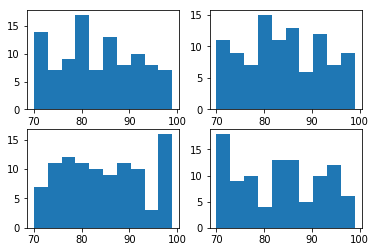

In [35]:
plt.subplot(2,2,1)
plt.hist(q1_grades)

plt.subplot(2,2,2)
plt.hist(q2_grades)

plt.subplot(2,2,3)
plt.hist(q3_grades)

plt.subplot(2,2,4)
plt.hist(q4_grades)
plt.show()

In [ ]:
plt.hist(q1_grades)
plt.show()

## Assertion tests
Run the code below to check if there is anything missing in your implementation. The following code below checks for:
- shape of your dataframe should be 400x7
- existence of `student_id`, `name`, `quarter`, `grade`, `year_entered`, `major` and `specialization` inside the `student_cleaned_df` dataframe
- existence of the `students_cleaned.csv` output csv file

In [4]:
assert 'student_id' in student_cleaned_df.columns, "student_id column does not exist in student_cleaned_df"
assert 'name' in student_cleaned_df.columns, "name column does not exist in student_cleaned_df"
assert 'quarter' in student_cleaned_df.columns, "quarter column does not exist in student_cleaned_df"
assert 'grade' in student_cleaned_df.columns, "grade column does not exist in student_cleaned_df"
assert 'year_entered' in student_cleaned_df.columns, "year_entered column does not exist in student_cleaned_df"
assert 'major' in student_cleaned_df.columns, "major column does not exist in student_cleaned_df"
assert 'specialization' in student_cleaned_df.columns, "specialization column does not exist in student_cleaned_df"
assert student_cleaned_df.shape == (400,7), "Dataframe's shape does not match expected shape"
from os import path
assert path.exists('students_cleaned.csv'),"students_cleaned.csv does not exists in current directory!"